Epoch 0, RMSE: 143413.4122, LR: 0.009990
Epoch 100, RMSE: 117998.3033, LR: 0.009039
Epoch 200, RMSE: 121230.4736, LR: 0.008178
Epoch 300, RMSE: 117698.7552, LR: 0.007400
Epoch 400, RMSE: 117688.7310, LR: 0.006695
Epoch 500, RMSE: 120948.5970, LR: 0.006058
Epoch 600, RMSE: 118075.0942, LR: 0.005481
Epoch 700, RMSE: 121131.7068, LR: 0.004959
Epoch 800, RMSE: 116724.1284, LR: 0.004487
Epoch 900, RMSE: 119054.1603, LR: 0.004060
Epoch 1000, RMSE: 121131.5578, LR: 0.003673
Epoch 1100, RMSE: 117501.4884, LR: 0.003324
Epoch 1200, RMSE: 119314.2891, LR: 0.003007
Epoch 1300, RMSE: 117267.3558, LR: 0.002721
Epoch 1400, RMSE: 118630.5575, LR: 0.002462
Epoch 1500, RMSE: 116390.0542, LR: 0.002227
Epoch 1600, RMSE: 122642.5148, LR: 0.002015
Epoch 1700, RMSE: 117314.3673, LR: 0.001823
Epoch 1800, RMSE: 115694.0460, LR: 0.001650
Epoch 1900, RMSE: 116127.0940, LR: 0.001493

Stochastic GD Results:
Train RMSE: 116089.5141
Test RMSE:  111334.4319
Train R²:   -0.0082
Test R²:    0.0541


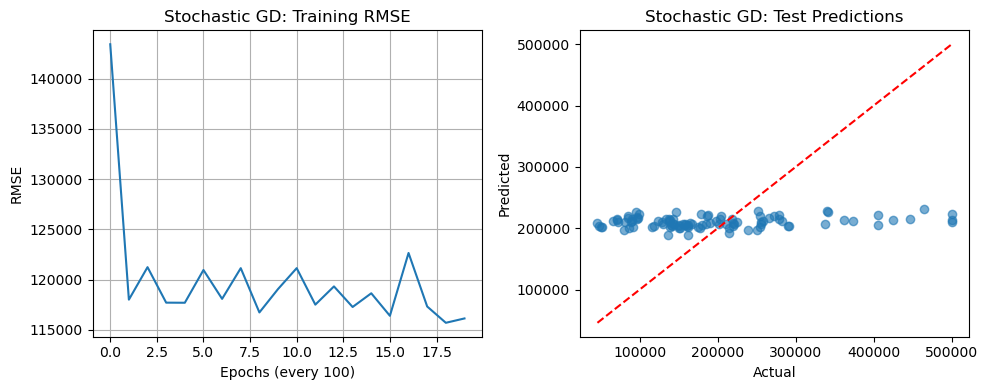

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, r2_score
df = pd.read_csv('housing.csv')
numeric_cols = df.select_dtypes(include=[np.number]).columns
target_col = numeric_cols[-1]
X = df[numeric_cols[:-1]].fillna(df[numeric_cols[:-1]].median()).values
y = df[target_col].fillna(df[target_col].median()).values

X = np.c_[np.ones(X.shape[0]), X]
y = y.reshape(-1, 1)

scaler = StandardScaler()
X[:, 1:] = scaler.fit_transform(X[:, 1:])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def stochastic_gradient_descent(X, y, learning_rate=0.01, n_epochs=1000, decay_rate=0.999):
    m = len(y)
    n_features = X.shape[1]
    theta = np.random.randn(n_features, 1) * 0.01
    
    train_errors = []
    lr_schedule = learning_rate
    
    for epoch in range(n_epochs):
        np.random.shuffle(X_train)  # Shuffle each epoch
        np.random.shuffle(y_train)
        
        for i in range(m):
            xi = X_train[i:i+1].T  # Single sample
            yi = y_train[i:i+1]
            gradient = 2 * xi.dot(xi.T.dot(theta) - yi)
            theta -= lr_schedule * gradient
        
        # Learning rate decay
        lr_schedule *= decay_rate
        
        if epoch % 100 == 0:
            train_err = root_mean_squared_error(y_train, X_train.dot(theta))
            train_errors.append(train_err)
            print(f"Epoch {epoch}, RMSE: {train_err:.4f}, LR: {lr_schedule:.6f}")
    
    return theta, train_errors

# Train SGD
theta_sgd, train_errors_sgd = stochastic_gradient_descent(X_train, y_train, n_epochs=2000)

# Predict and evaluate
y_train_pred_sgd = X_train.dot(theta_sgd)
y_test_pred_sgd = X_test.dot(theta_sgd)

print("\nStochastic GD Results:")
print(f"Train RMSE: {root_mean_squared_error(y_train, y_train_pred_sgd):.4f}")
print(f"Test RMSE:  {root_mean_squared_error(y_test, y_test_pred_sgd):.4f}")
print(f"Train R²:   {r2_score(y_train, y_train_pred_sgd):.4f}")
print(f"Test R²:    {r2_score(y_test, y_test_pred_sgd):.4f}")

# Plot convergence
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_errors_sgd)
plt.title('Stochastic GD: Training RMSE')
plt.xlabel('Epochs (every 100)')
plt.ylabel('RMSE')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test[:100], y_test_pred_sgd[:100], alpha=0.6)
plt.plot([y_test[:100].min(), y_test[:100].max()], [y_test[:100].min(), y_test[:100].max()], 'r--')
plt.title('Stochastic GD: Test Predictions')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.tight_layout()
plt.show()
